In [1]:
# Dense neural network for images classification from fashion_mnist- dataset.

import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten 
from keras.models import Sequential
import matplotlib.pyplot as plt


In [2]:
# run this if you have SSL problems

import ssl


ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
# train/test data splitting 

(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [4]:
# output first objects from feature/label train dataset

print(x_train[0])
print(y_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

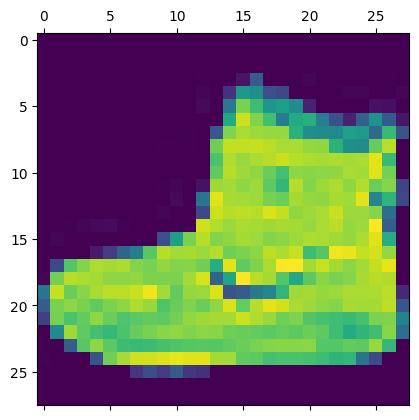

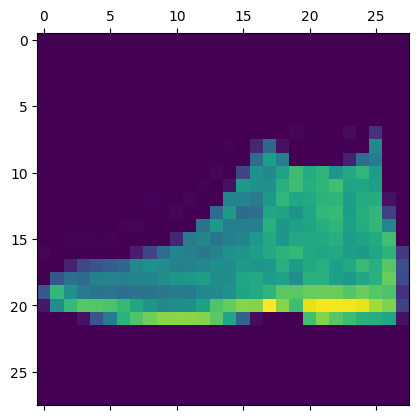

In [5]:
# output first objects from feature/label test dataset

plt.matshow(x_train[0])
plt.matshow(x_test[0])

In [6]:
# data scaling 

# let's carry out scaling to improve accuracy - since the maximum value of our arrays is 255, they need to be divided
# to 255 so that all values ​​fall between 0 and 1

x_train = x_train / 255.0
x_test = x_test / 255.0

In [7]:
# train datasets shape output

print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [8]:
print(x_test.shape)
print(y_test.shape)

print(x_test[1])
print(y_test[0])


(10000, 28, 28)
(10000,)
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.05098039 0.2627451
  0.         0.         0.         0.         0.19607843 0.14901961
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.03137255 0.47058824 0.81960784 0.88627451 0.96862745
  0.92941176 1.         1.         1.         0.96862745 0.93333333
  0.92156863 0.6745098  0.28235294 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.5372549  0.9372549  0.98823529 0.95294118 0.91764706 0.89803922
  0.93333333 0.95686275 0.96470588 0.94117647 0.90196078 0.90980392
  0.9372549  0.97254902 0.98431373 0.76078431 0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.4
  1.  

In [9]:
# any image is a matrix of values ​​(a two-dimensional vector).
#  Neural networks accept only one-dimensional vectors as input, so the two-dimensional vector,
#  which is an image, must be flattened

# the size of our vectors (which we can set using the shape method) is 28*28, 
# so the flattened one-dimensional vector will have a dimension of (784,) - because 28*28=784
# we place the transformed vectors into new variables


# for features from train set
x_train_flattened = x_train.reshape(len(x_train), 28*28)

# same for features from test set
x_test_flattened = x_test.reshape(len(x_test), 28 * 28)

# output shapes of new flattened vectors
# as you see, new shape is (60000, 784) for train set and 10000, 784) for test set
print(x_train_flattened.shape)
print(x_test_flattened.shape)





(60000, 784)
(10000, 784)


In [10]:
# NN model with 3 layers 


model = keras.Sequential([

    Dense(100, input_shape = (784,), activation = "relu"),
    Dense(10, activation = "sigmoid"),

])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])



model.fit(x_train_flattened, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 1s 702us/step - loss: 0.5055 - accuracy: 0.8246
Epoch 2/5
1875/1875 [==============================] - 1s 796us/step - loss: 0.3824 - accuracy: 0.8622
Epoch 3/5
1875/1875 [==============================] - 1s 685us/step - loss: 0.3461 - accuracy: 0.8735
Epoch 4/5
1875/1875 [==============================] - 1s 771us/step - loss: 0.3176 - accuracy: 0.8837
Epoch 5/5
1875/1875 [==============================] - 1s 714us/step - loss: 0.3009 - accuracy: 0.8899


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 0s 470us/step - loss: 0.3494 - accuracy: 0.8761


[0.3493514955043793, 0.8761000037193298]

In [13]:
pred = model.predict(x_test_flattened)

313/313 [==============================] - 0s 425us/step


Predicted class: Ankle boot


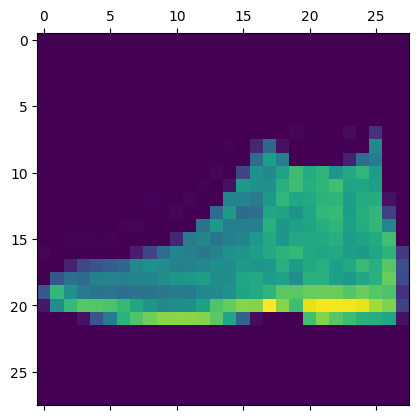

Predicted class: Pullover


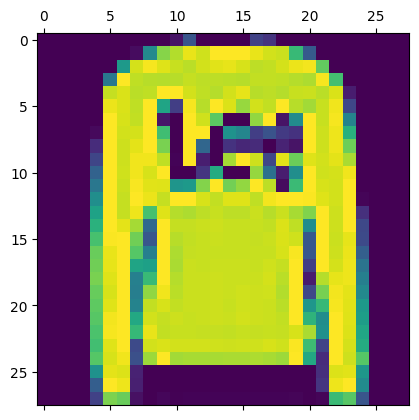

Predicted class: Trouser


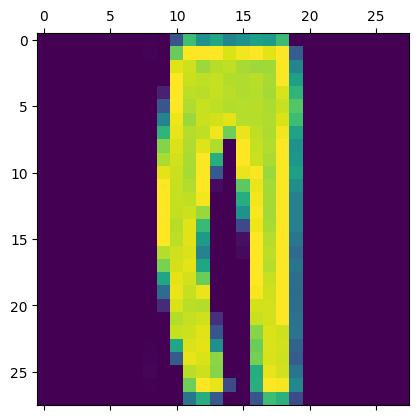

Predicted class: Trouser


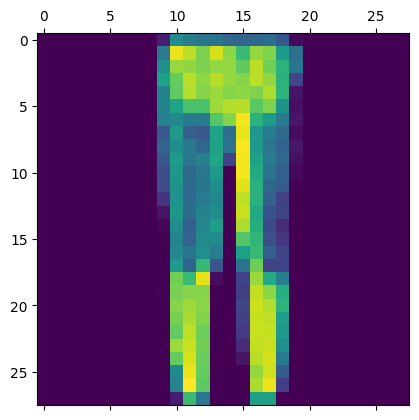

Predicted class: Shirt


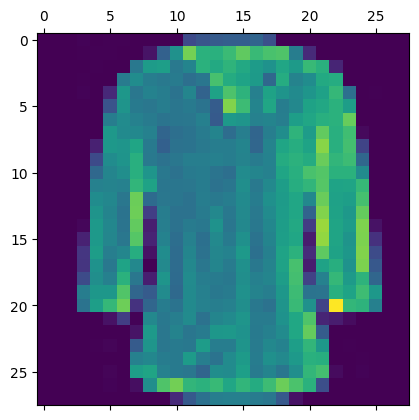

Predicted class: Trouser


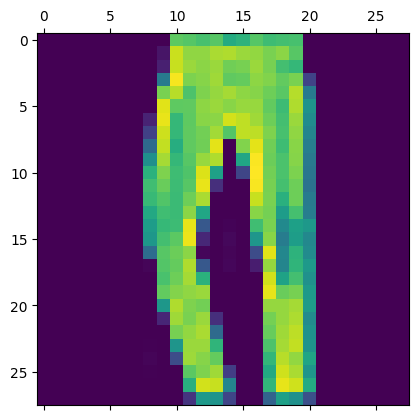

Predicted class: Coat


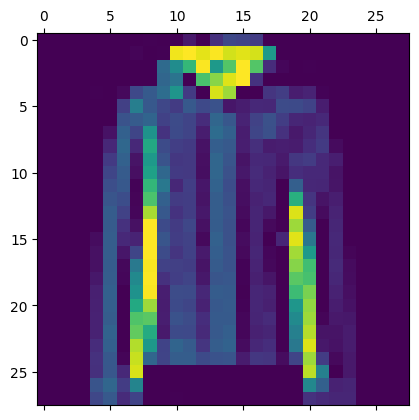

Predicted class: Shirt


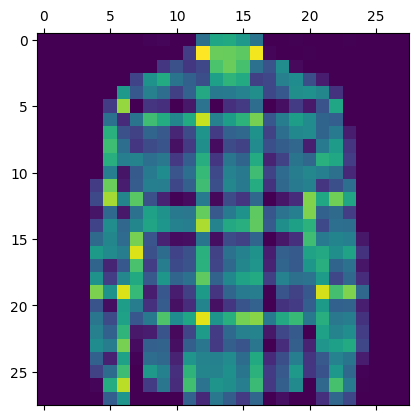

Predicted class: Sandal


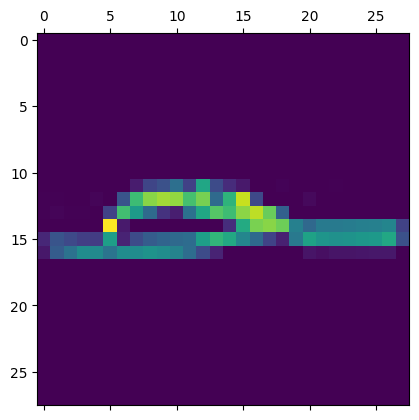

Predicted class: Sneaker


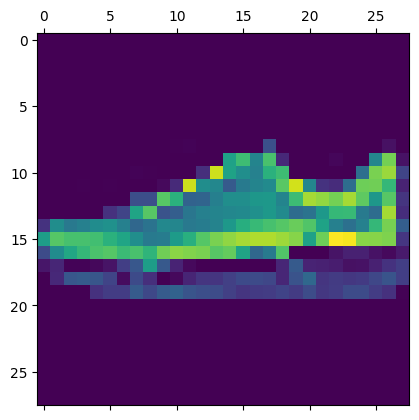

In [14]:
# predictions pipline output

class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

for i in range(10):
    pred_label = np.argmax(pred[i])
    pred_class = class_names[pred_label]
    print(f"Predicted class: {pred_class}")
    plt.matshow(x_test[i])
    plt.show()

In [15]:
# let's create an object in which we will place the predicted values ​​for all objects of the pre array
predicted_labes = [np.argmax(i) for i in pred]
# we can output an array with the first five predictions 
print(predicted_labes[:5])

[9, 2, 1, 1, 6]


In [16]:
# confusion matrix output

cm = tf.math.confusion_matrix(labels=y_test, predictions=predicted_labes)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[868,   3,  24,  19,   5,   2,  70,   0,   9,   0],
       [  2, 974,   2,  16,   3,   0,   1,   0,   2,   0],
       [ 13,   0, 834,  10,  94,   0,  46,   0,   3,   0],
       [ 39,   8,  17, 885,  27,   0,  15,   0,   9,   0],
       [  0,   1, 126,  32, 813,   0,  26,   0,   2,   0],
       [  0,   0,   0,   1,   0, 951,   0,  29,   2,  17],
       [175,   0, 121,  26, 117,   0, 547,   0,  14,   0],
       [  0,   0,   0,   0,   0,  11,   0, 940,   0,  49],
       [  6,   0,   3,   2,   4,   1,   3,   6, 975,   0],
       [  0,   0,   0,   0,   0,   5,   1,  20,   0, 974]], dtype=int32)>

Text(95.72222222222221, 0.5, 'Reals')

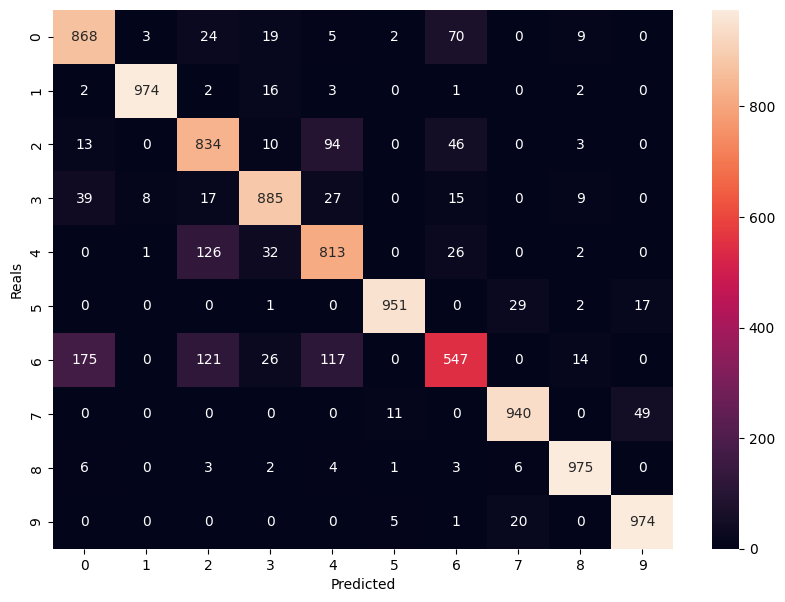

In [17]:
# the axis of digits highlighted in bright color shows the number of classes correctly classified according
# to their real meaning
# for example, if the coordinate 0 and 0 contains the number 962, then this means that class 0 was correctly classified as 0 - 962 times



import seaborn as sn
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Reals")
